# Tarea 5

### Fecha *límite* de entrega: **lunes 28 de septiembre a las 15:00**

[1]
(i) Considera el método de Newton para funciones $f: \mathbb{C} \to \mathbb{C}$ de los *complejos* $z$. 
Impleméntalo para estas funciones. ¿Cómo tomas en cuenta el hecho de que los números sean complejos en Julia?

In [41]:
### Solución a 1.0

### No usamos la diferenciación numérica porque las funciones complejas a menudo ni siquiera tienen derivada
### El método de Newton acepta la función cuyas raices hay que encontrar (f),
### su derivada (fp), la adivinanza inicial z0 y el límite de recursión n (100 por defecto):
function find_root_newton(f, fp, z0, n=100)
    # Checamos si no llegamos al límite de recursión
    if n == 0
        return z0
    end
    
    znext = z0 - f(z0)/fp(z0)
    return find_root_newton(f, fp, znext, n-1)
end;

(ii) Considera la función particular $f: z \mapsto z^3 -1$.  Resulta que para algunos valores de $z$, el método de Newton *no converge*; por lo tanto, debes asegúrate de  salir de la función después de un número máximo de iterados.

In [42]:
# Vamos a definir la función y su derivada, mientras que la evaluación la pospondremos para el próximo ejercicio
f(z) = z^3 - 1
fp(z) = 3z^2

fp (generic function with 1 method)

(iii) Genera una matriz que contiene el resultado de aplicar el método de Newton a esta función $f$ para cada número complejo en una región cuadrada alrededor de $z=0$ del plano complejo. Los resultados son los números complejos a los cuales converge el método. (¿Cuáles deberían ser? ¿Es cierto?)

In [43]:
# La matriz de los resultados
res_matrix = [find_root_newton(f, fp, x+y*im) for x in linspace(-10,10,500), y in linspace(-10,10,500)]

500x500 Array{Any,2}:
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
     ⋮                             ⋱                   

**Solución:**

Se puede ver que los tres diferentes valores que ocurren en la matriz son $1$ y $\approx -0.5 \pm 0.866$ que son las tres raices de la ecuación.

(iv) Usa la función gráfica `imshow` para graficar el resultado: `imshow` dibuja una matriz como pixeles coloreados, en los cuales los colores utilizados corresponden a los valores almacenados en las entradas correspondientes de la matriz. ¿Qué ves? ¿Cuál es la interpretación?

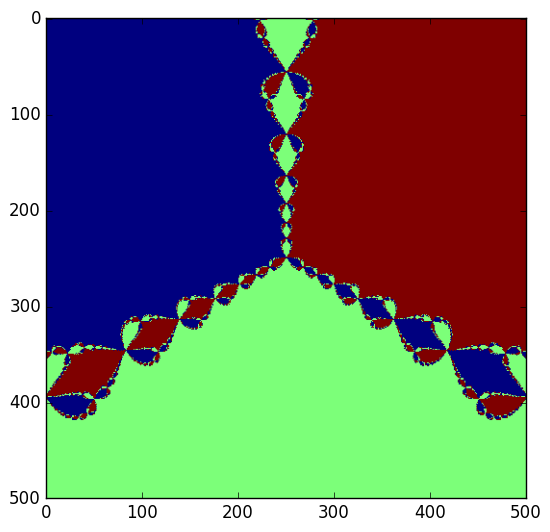

PyObject <matplotlib.image.AxesImage object at 0x7f19131372e8>

In [44]:
# Nota: ploteamos la parte imaginaria solamente porque nos permite distinguir entre las diferentes raices
using PyPlot
imshow(imag(res_matrix))

**Solución: lo que sale en la gráfica es bastante interesante. Parece ser un fractal, de hecho. Como siempre, el resultado del método de Newton depende del punto de inicio**

** (v) Extender esto a otras funciones interesantes. Utiliza `Interact.jl`. ¿Qué concluyes en general?

[2] Como vimos en el notebook 11, para llevar a cabo una integración numérica, resulta útil el *interpolar* una función, es decir, ajustar una función de un tipo dado para que pase por unos datos. También vimos que no es evidente cómo ajustar, por ejemplo, una cuadrática a tres puntos.

Una manera de hacer esto es con el siguiente método ("interpolación de Lagrange").

Pensemos en un conjunto de datos con coordenadas $x_i$, con valores $y_i$, para $i=1, \ldots, n$, que queremos interpolar con una función $L(x)$, tal que $f(x_i) = f_i$ para cada $i$.

(i) Para $n = 2$, encuentra el polinomio más sencillo $f_1(x)$ de $x$ que da $0$ para $x=x_2$. [Pista: ¡es realmente sencillo!] Normalízala para que también dé $1$ cuando $x=x_1$. Encuentra una función $f_2(x)$ al revés, que da $0$ para $x=x_1$ y $1$ para $x=x_2$.

**Solución**
El polinomio $f_1(x)$ está dado por $\frac{x-x_2}{x_1-x_2}$. Es evidente que da 1 en $x_1$ y 0 en $x_2$. Análogamente, 

$$f_2(x) = \frac{x_1-x}{x_1-x_2}$$

En código:

In [45]:
f1(x, x_1, x_2) = (x - x_2)/(x_1 - x_2);
f2(x, x_1, x_2) = (x_1 - x)/(x_1 - x_2);

(ii) Así, construye un polinomio (en este caso, una función *lineal* de $x$) que interpola entre los dos puntos.

Este polinomio tiene que cumplir que $p(x_1) = f(x_1)$ y $p(x_2) = f(x_2)$. Esto se cumple si:
$$p(x, x_1, x_2) = f(x_1)\cdot f_1(x, x_1, x_2) + f(x_2)\cdot f_2(x, x_1, x_2) \: ,$$
donde $f(x)$ es la función a interpolar.

En código:

In [46]:
p(x, x_1, x_2, f) = f(x_1)*f1(x, x_1, x_2) + f(x_1)*f2(x, x_1, x_2)

p (generic function with 1 method)

Convendrá escribir una función auxiliar para aplicar la interpolación a una malla y regresar el valor interpolado. Para esto, solo es necesario encontrar los $x_1$ y $x_2$ alrededor de un $x$ dado

In [47]:
# Tomamos una arreglo de pares (x_n, f(x_n)) (con x creciente) y regresamos la interpolación. x tiene que estar 
# adentro del rango de x_n's
function interp_one(x, pairs)
    x_values = pairs[:, 1]
    
    x1_index = maximum(find(u -> (u <= x), x_values))
    x2_index = x1_index + 1
    
    # Puntos x de interpolación
    x1 = pairs[x1_index, 1]
    x2 = pairs[x2_index, 1]
    
    # Valores de f en estos puntos
    f1_value = pairs[x1_index, 2]
    f2_value = pairs[x2_index, 2]
    
    return f1_value*f1(x, x1, x2) + f2_value*f2(x, x1, x2)
end

interp_one (generic function with 1 method)

(iii) Escribe una función de Julia que evalúa este polinomio. 

** Vea lo anterior para la solución **

(iv) Toma la función $\sin(x)$ y toma una malla en $x$. Dibuja la función original y la función interpolada entre cada par de nodos consecutivos de la malla.

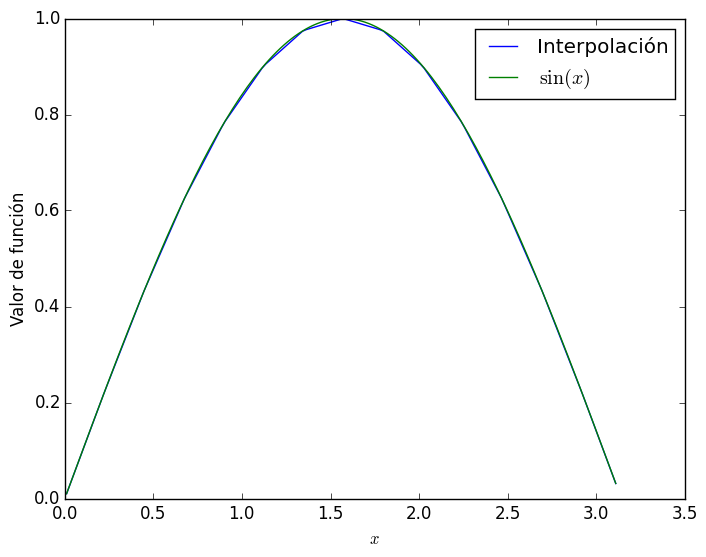

PyObject <matplotlib.legend.Legend object at 0x7f19130ff6a0>

In [48]:
using PyPlot

### Solución
# Construiremos la malla en [0:π] y será relativamente "gruesa":
xvalues = linspace(0, π, 15)
fvalues = [sin(x) for x in xvalues]
pairs = hcat(xvalues, fvalues);

plot_xvalues = linspace(0.01, 0.99*π, 150);

plot(plot_xvalues, [interp_one(x, pairs) for x in plot_xvalues], label="Interpolación")
plot(plot_xvalues, [sin(x) for x in plot_xvalues], label=L"\sin(x)")
xlabel(L"x")
ylabel("Valor de función")
legend()

(v) Integra la función interpolada y así encuentra una fórmula, en términos de las $x_i$ y las $y_i$, para la integral de una función $f

**Solución:**

Cada pedazo interpolado tiene una integral dada por 

$$\int_{x_i}^{x_{i+1}} p(x, x_i, x_{i+1}) \: dx= \frac{x_{i+1} + x_{i}}{2} \cdot (f(x_{i+1}) - f(x_{i}))$$

que sigue del hecho que la integral es el área de un trapecio (de hecho es la aproximación de trapecios). Así, la integral de la función:

$$\int_{x_0}^{x_n} f(x) \: dx \approx \sum_{i=0}^{n-1} \frac{x_{i+1} + x_{i}}{2} \cdot (f(x_{i+1}) - f(x_{i}))$$

En código:

In [49]:
# n es el número de subintervalos en los que dividir el intervalo de integración
function integrate_one(f, x_begin, x_end, n)
    h = (x_end - x_begin)/n;
    x_values = linspace(x_begin, x_end, n+1) # (n+1) es porque el número de puntos el número de intervalos + 1
    
    sum = 0
    
    for x_index in 1:length(x_values)-1
        sum += h/2 * (f(x_values[x_index+1]) + f(x_values[x_index]))
    end
    
    return sum
end

integrate_one (generic function with 1 method)

(vi) Encuentra numéricamente la tasa de convergencia de esta aproximación a la integral cuando el tamaño de las celdas $x_{i+1}-x_i = h$ va a cero.

In [50]:
nvalues = [1:10000];

# El error de la integración
convergence = [abs(integrate_one(x -> sin(x), 0, π, n) - 2) for n in nvalues];

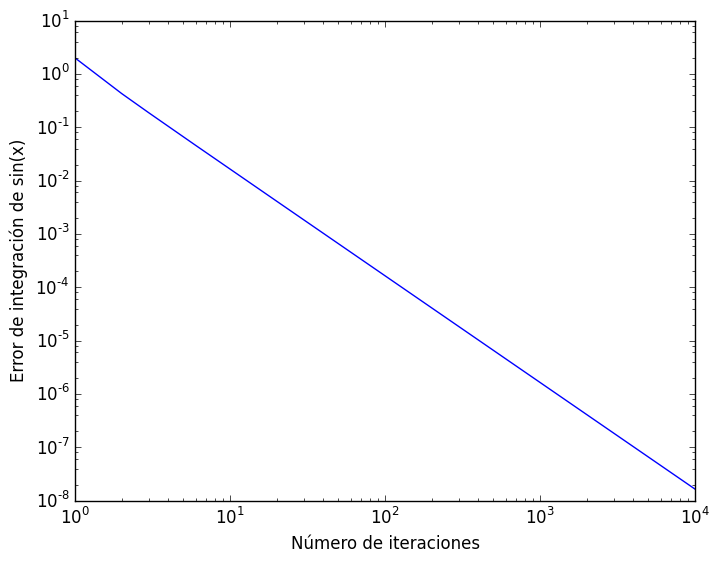

PyObject <matplotlib.text.Text object at 0x7f190fcedc18>

In [51]:
plot(nvalues, convergence, label="Error de integración")
yscale("log")
xscale("log")
xlabel("Número de iteraciones")
ylabel("Error de integración de sin(x)")

** Notemos que la convergencia es una linea recta en una gráfica log-log, lo cual implica que el error es proporcional a $n^{-\alpha}$. Encontrar $\alpha$ es fácil:**

In [52]:
α = linreg(float([log(n) for n in nvalues]), float([log(err) for err in convergence]))[2]

-2.0002349399826262

** Concluimos que la integral numérica converge como $\frac{1}{n^2}$ al valor ideal. Como $n \propto \frac{1}{h}$, entonces es equivalente decir que la integral converge como $h^2$, donde $h$ es el tamaño de la celda**

[3] Haz lo mismo con un polinomio de segundo grado (cuadrático) que interpole tres puntos, siguiendo la misma esquema:

(i) Encuentra una función $f_1(x)$ que dé $1$ en $x_1$, y $0$ en $x_2$ *Y* en $x_3$, etc, y así una función cuadrática que interpole 3 puntos.

**Solución:**

Seguiremos el mismo pensamiento que en el ejercicio anterior. Entonces

$$f_1 = \frac{(x-x_2) (x-x_3)}{(x_1-x_2)(x_1-x_3)}$$

$$f_2 = \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}$$

$$f_3 = \frac{(x-x_1) (x-x_2)}{(x_3-x_1) (x_3-x_2)}$$

En código:

In [53]:
# Estas funciones sobrecargarán las funciones anteriores, así que no hay problema
f1(x, x1, x2, x3) = ((x-x2)*(x-x3))/((x1-x2)*(x1-x3));
f2(x, x1, x2, x3) = ((x-x1)*(x-x3))/((x2-x1)*(x2-x3));
f3(x, x1, x2, x3) = ((x-x1)*(x-x2))/((x3-x1)*(x3-x2));

Ahora definimos una función auxiliar para hacer la interpolación:

In [54]:
# Tomamos una arreglo de pares (x_n, f(x_n)) (con x creciente) y regresamos la interpolación. x tiene que estar 
# adentro del rango de x_n's
function interp_two(x, pairs)
    x_values = pairs[:, 1]
    
    x1_index = maximum(find(u -> (u <= x), x_values))
    x2_index = x1_index + 1
    x3_index = x1_index + 2
    
    # Puntos x de interpolación
    x1 = pairs[x1_index, 1]
    x2 = pairs[x2_index, 1]
    x3 = pairs[x3_index, 1]
    
    # Valores de f en estos puntos
    f1_value = pairs[x1_index, 2]
    f2_value = pairs[x2_index, 2]
    f3_value = pairs[x3_index, 2]
    
    return f1_value*f1(x, x1, x2, x3) + f2_value*f2(x, x1, x2, x3) + f3_value*f3(x, x1, x2, x3)
end

interp_two (generic function with 1 method)

(ii) Dibuja la función $\sin(x)$, la aproximación con polinomios de primer grado, y la aproximación con polinomios de segundo grado en la misma gráfica.

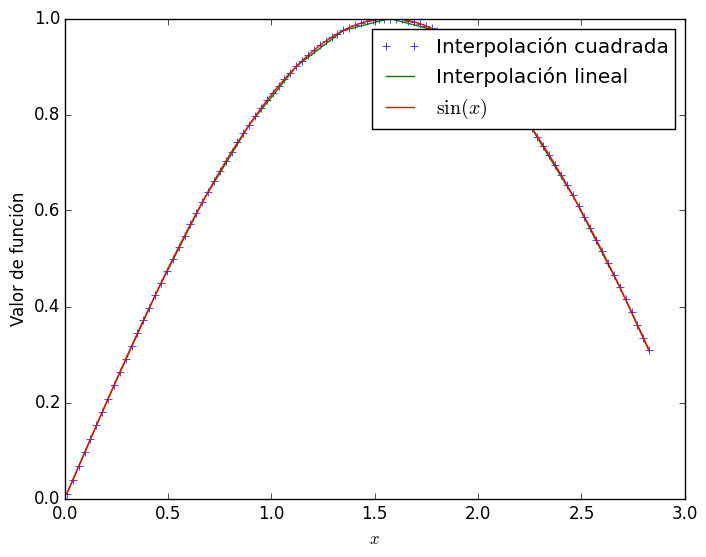

PyObject <matplotlib.legend.Legend object at 0x7f19134fb7b8>

In [58]:
### Solución
# Construiremos la malla en [0:π] y será relativamente "gruesa":
xvalues = linspace(0, π, 15)
fvalues = [sin(x) for x in xvalues]
pairs = hcat(xvalues, fvalues);

plot_xvalues = linspace(0.01, 0.9*π, 100);

plot(plot_xvalues, [interp_two(x, pairs) for x in plot_xvalues], "+", label="Interpolación cuadrada")
plot(plot_xvalues, [interp_one(x, pairs) for x in plot_xvalues], label="Interpolación lineal")
plot(plot_xvalues, [sin(x) for x in plot_xvalues], label=L"\sin(x)")
xlabel(L"x")
ylabel("Valor de función")
legend()

(iii) Integra la función resultante, y así da una aproximación nueva para una función dada en términos de los valores $y_i$.

**Integramos la interpolación en $x_i, x_{i+1}, x_{i+2}$ sobre $[x_i,x_{i+1}]$. También asumimos que se cumple $x_{i+1} - x_{i} = h = const$. Entonces, el resultado de integración se vuelve**

$$\int_{x_i}^{x_{i+1}} f(x) \: dx \approx \frac{h}{12} (5f_i + 8f_{i+1} + 5f_{i+2})$$

Así, la integral total es simplemente igual a la suma:

$$\frac{h}{12} \sum_{i=0}^{n-1}(5f_{i} + 8f_{i+1} + 5f_{i+2})$$

El último término de la suma tiene un valor que se sale del rango, pero esto se puede resolver al integrar la última interpolación de $x_{i+1}$ a $x_{i+2}$ que nos da un resultado final

$$\frac{h}{12} \left( \sum_{i=0}^{n-2}(5f_{i} + 8f_{i+1} + 5f_{i+2}) - (f_{n-2}-8f_{n-1}+f_n) \right)$$

(iv) Encuentra numéricamente la tasa de convergencia de este método cuando el tamaño de las celdas va a cero.

In [56]:
# n es el número de subintervalos en los que dividir el intervalo de integración
function integrate_two(f, x_begin, x_end, n)
    h = (x_end - x_begin)/n;
    x_values = linspace(x_begin, x_end, n+1) # (n+1) es porque el número de puntos el número de intervalos + 1
    
    sum = 0
    N = length(x_values)
    
    for x_index in 1:N-2
        sum += h/12 * (5*f(x_values[x_index+1]) + 8*f(x_values[x_index+2]) + 5f(x_values[x_index+2]))
    end
    
    sum -= h/12 * (f(x_values[N-2]) - 8*f(x_values[N-1]) + f(x_values[N]))
    
    return sum
end

integrate_two (generic function with 1 method)

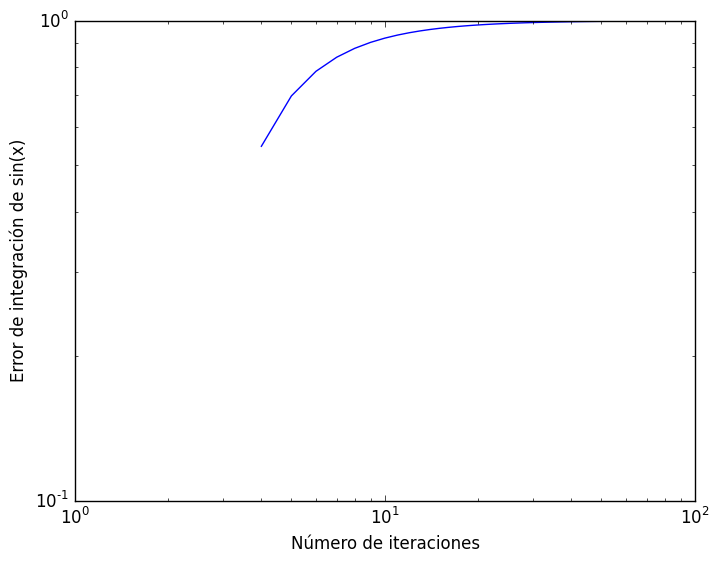

PyObject <matplotlib.text.Text object at 0x7f1912f95ba8>

In [57]:
nvalues = [4:100];

# El error de la integración
convergence = [abs(integrate_two(x -> sin(x), 0, π, n) - 2) for n in nvalues];
plot(nvalues, convergence)

yscale("log")
xscale("log")
xlabel("Número de iteraciones")
ylabel("Error de integración de sin(x)")

## Nota: no pude hacer funcionar la convergencia en este caso